In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import json from pandas import json_normalize
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_json('./data/train.json')
df_genre = pd.read_json('./data/genre_gn_all.json', orient='index')
df_song = pd.read_json('./data/song_meta.json')

### df_train : 학습할 틀레이리스트 데이터 ( 제목, 노래목록..Etc)

In [6]:
df_train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


### df_genre : 장르번호 - 장르

In [7]:
df_genre.head()

,0
GN0100,발라드
GN0101,세부장르전체
GN0102,'80
GN0103,'90
GN0104,'00


### df_song : 노래정보

In [8]:
df_song.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [17]:
#playlist 피쳐 Null 값 비율
# for col in df_song.columns:
#     msg = 'columns : {:>25} \t Percent of NaN value: {:.20f}%'.format(col, 100 * (df_song[col].isnull().sum() / df_song[col].shape[0]))
#     print(msg)

In [19]:
# 장르 index = 장르 이름
# for genre in df_genre.index:
#     print("index : " + genre + "  genre : " + df_genre[0][genre])

index : GN0100  genre : 발라드
index : GN0101  genre : 세부장르전체
index : GN0102  genre : '80
index : GN0103  genre : '90
index : GN0104  genre : '00
index : GN0105  genre : '10-
index : GN0200  genre : 댄스
index : GN0201  genre : 세부장르전체
index : GN0202  genre : '80
index : GN0203  genre : '90
index : GN0204  genre : '00
index : GN0205  genre : '10-
index : GN0300  genre : 랩/힙합
index : GN0301  genre : 세부장르전체
index : GN0302  genre : 랩 스타일
index : GN0303  genre : 보컬 스타일
index : GN0304  genre : 언더그라운드 힙합
index : GN0305  genre : 시대별
index : GN0400  genre : R&B/Soul
index : GN0401  genre : 세부장르전체
index : GN0402  genre : 어반
index : GN0403  genre : R&B
index : GN0500  genre : 인디음악
index : GN0501  genre : 세부장르전체
index : GN0502  genre : 포크
index : GN0503  genre : 록
index : GN0504  genre : 일렉
index : GN0505  genre : 힙합
index : GN0506  genre : 발라드
index : GN0507  genre : '90
index : GN0508  genre : '00
index : GN0509  genre : '10-
index : GN0600  genre : 록/메탈
index : GN0601  genre : 세부장르전체
index : GN0602 

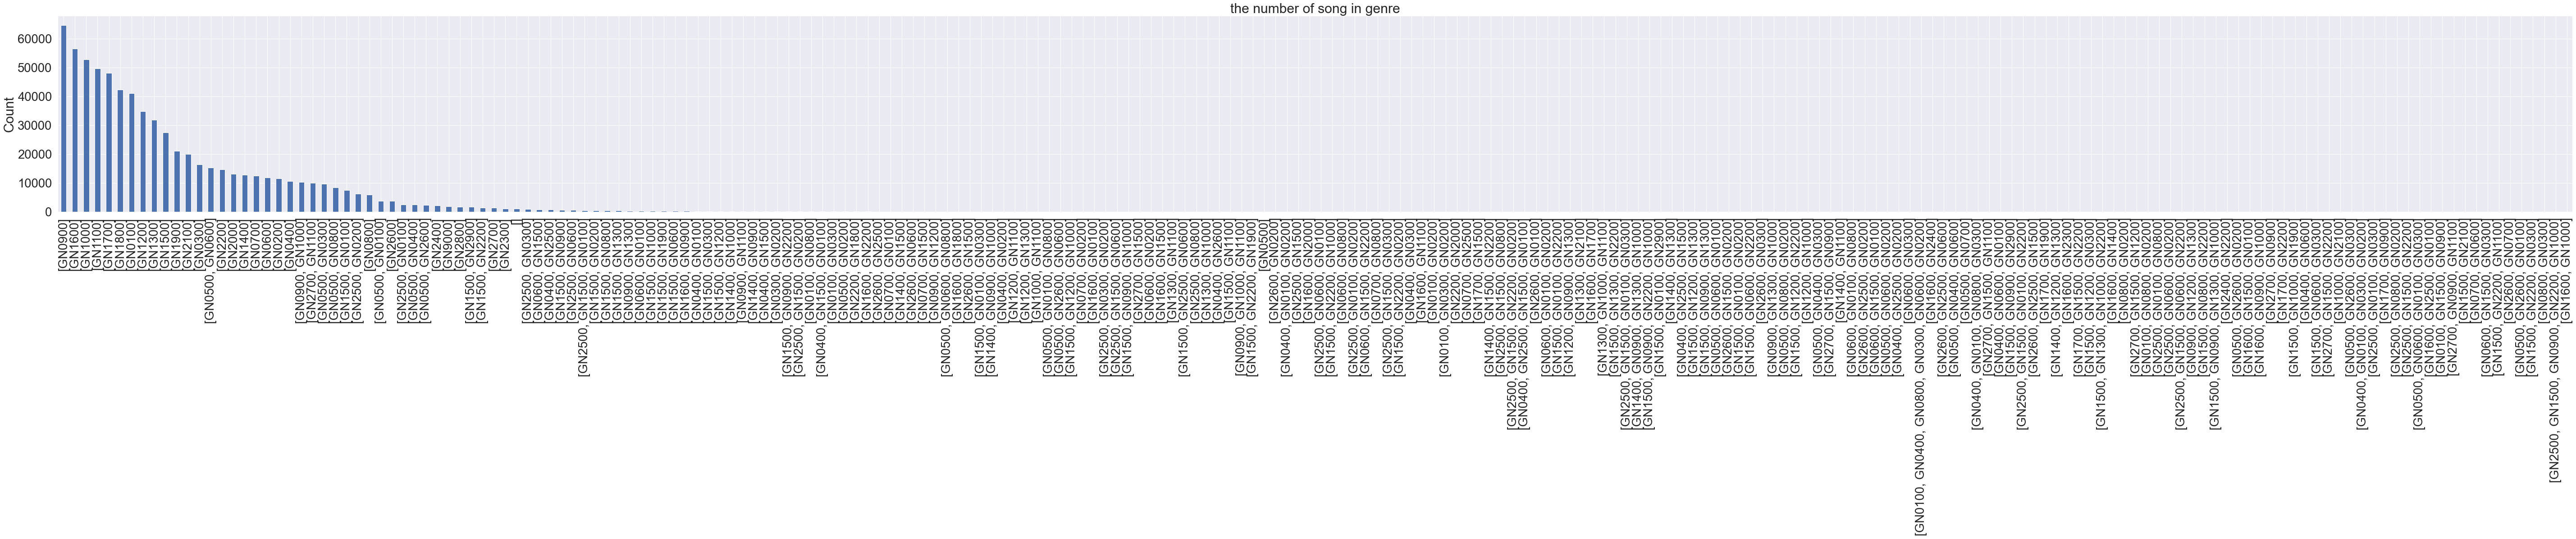

In [20]:
# 장르별 노래 분포
# f, ax = plt.subplots(1, 1, figsize=(100,8))
# df_song['song_gn_gnr_basket'].value_counts().plot.bar(ax= ax)
# ax.set_title('the number of song in genre')
# ax.set_ylabel('Count')
# plt.show()

### 이름에 크리스마스, 캐럴이 포함된 플레이스트  개수, 목록

In [21]:
playlist = []
for index in df_train.index:
    tag = df_train['plylst_title'][index]
    if('크리스마스' in tag or '캐럴' in tag or '캐롤' in tag):
        playlist.append(index)
#         print(tag)
#             print("{:8} 제목 : ".format(index)+ df_train['plylst_title'][index])
print(len(playlist))

1634


In [26]:
#사용할때
# print(df_song['parameter'][index])

# print(df_genre[0].index[0])
# print(df_genre.index[0])

# print(df_train['songs'][0])

# 크리스마스 장르 번호 == GN3000

GN0100


In [40]:
for index in playlist:
    print("index : {:}".format(df_train['plylst_title'][index]))

index : 크리스마스 분위기에 흠뻑 취하고 싶을때
index : 크리스마스를 책임질 캐롤 모음
index : 느낌있는 크리스마스 쏭
index : 크리스마스9
index : 미리 메리 크리스마스
index : 우리카페에서 들려주는 크리스마스 캐럴
index : 신나는 크리스마스에 어울리는 캐롤과 노래! 준비했어 널 위해~
index : 크리스마스 분위기 물씬 나는 곡들 총집합!
index : 선곡이좋은 <주말카페>에서 들리는 달달한 봄캐롤송.
index : 봄에 듣는 크리스마스 송
index : ★ 올 댓 크리스마스 캐롤! ★
index : 크리스마스를 앞두고, 아이돌의 겨울 노래
index : 크리스마스를 맞이하며
index : 신나는크리스마스
index : 베리베리 해피 메리 크리스마스~!!!
index : 크리스마스 노래에 퐁당 빠져보아요
index : 따뜻한 카페에서 듣고 싶은 재즈 캐롤 연주곡
index : 크리스마스156
index : 미리 크리스마스 즐겨요
index : 밝고 설렘 가득 크리스마스 시즌을 위한 캐롤들!
index : 메리 크리스마스 !
index : ✔️올 크리스마스는 요고당! 매력적인 음색의 R&B/팝 캐롤⛄️
index : 미리 메리크리스마스
index : 미리 메리 크리스마스
index : 카페에서 듣고 싶은 크리스마스 캐롤 ♬
index : 크리스마스 캐롤~ 잔잔하게 듣기좋은곡 모음 Merry Christmas
index : 크리스마스 마무리 캐롤
index : 기품있고 도도한 클래식 캐롤
index : 좀 있으면 벌써 크리스마스 ... 미리 듣는 성탄절 노래
index : 스위리 메리 크리스마스
index : ★이번주가 크리스마스야★
index : 크리스마스426
index : 크리스마스332
index : 크리스마스까지 계속 듣자
index : 크리스마스를 위한 추천곡 20선
index : 크리스마스204
index : 크리스마스 데이트를 위한 달달한 Soul/Funk
index : 미리 듣는 크리스마스
index :

##### 위 플레이리스트의 노래 목록 중 캐럴찾기

In [27]:
# 크리스마스 풀레이리스트속 노래에 캐럴이라고 장르 추가해주기   -> 돌리지말기
# isCarol = False;
# for index in playlist:  # 크리스마스 플레이리스트 번호 돌기
#     for songs in df_train['songs'][index]:  #크리스마스 플레이리스트 노래 돌기
#         isCarol = False;
#         for genre in df_song['song_gn_gnr_basket'][songs]:  #노래 장르 돌기
#             if genre == "GN3000":
#                 isCarol = True
#                 break
#         if isCarol == False:
#             df_song['song_gn_gnr_basket'][songs].append("GN3000")

In [41]:
carol_list = []   #위 크리스마스 플레이리스트 속 노래는 몇개? -> 라벨링 전

for index in playlist:  # 크리스마스 플레이리스트 번호 돌기
    for songs in df_train['songs'][index]:  #크리스마스 플레이리스트 노래 돌기
        if songs not in carol_list:
            carol_list.append(songs)

In [50]:
i = 0;
for song in carol_list:
    df_song['song_gn_gnr_basket'][song].append("GN3000")
print(len(carol_list))

15050


In [52]:
#노래에 캐롤 장르를 가진게 있을까? 있으면 출력하자   -> 오래걸림
carolNum = 0
i = 0
isCarol = False
for song in df_song.index:
    isCarol = False
    for genre in df_song['song_gn_gnr_basket'][song]:
        if genre == "GN3000":
            isCarol = True;
            break
    if isCarol == True:
        # print("Artist : {:}".format(df_song['artist_name_basket'][song]))
        print("song : {:}".format(df_song['song_name'][song]))
        carolNum += 1
print(carolNum)

song : Anonymous: Up! Awake! From Highest Steeple - Arr. Jacob Praetorius (1586-1651)
song : Mis Deseos / Feliz Navidad (with Thalia)
song : 있어줄래
song : 너에게 전하지 못한 말
song : Rollercoaster
song : Silhouette (Radio Edit)
song : 겨울 애상
song : 아메리카노에게
song : Love Blossom (러브블러썸)
song : 그 여름밤
song : No Make Up
song : Sleigh Ride
song : God Rest Ye Merry Gentlemen
song : Missing You (Feat. 누리 Of F.I.X)
song : L-O-V-E
song : Clementi : Piano Sonatine No.3 In C Major Op.36 - I. Spritoso (클레멘티 : 피아노 소나티네 3번 다장조 작품번호 36 - 1악장)
song : 반했나요
song : LIKEY
song : 크리스마스잖아요
song : Clementi : Piano Sonatine No.1 In C Major Op.36 - III. Vivace (클레멘티 : 피아노 소나티네 1번 다장조 작품번호 36 - 3악장)
song : Sleigh Ride
song : Deck The Halls / Silent Night
song : Christmas Eve (Album Version)
song : O Tannenbaum
song : Ave Maria, Dolce Maria
song : Open It Up
song : The Little Drummer Boy
song : All-Day, Everyday (Dunkin Ver.)
song : The Christmas Waltz
song : Cheer For The Elves
song : 체념
song : Besame Mucho
song : Winter So

In [39]:
#노래에 캐롤 장르를 가진게 몇개있을까? 1~20 까지
christmas =0;
i = 0;
print("start")
for song_genre in df_song['song_gn_gnr_basket']:
    for genre in song_genre:
        if genre == "GN3000":
            christmas = christmas + 1
            print("Find!")
    i += 1
    if(i>20):  #20까지만
        break;
print(christmas)

start
0


In [38]:
# 노래에 장르 조회 추가, 삭제
# print(df_song['song_gn_gnr_basket'][0])
# df_song['song_gn_gnr_basket'][0].append("GN3000")
# del df_song['song_gn_gnr_basket'][0][1]

['GN0900']


In [35]:
# del a[1]
# for v in my_list:
#     if v not in new_list:
#         new_list.append(v)